Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#### Data

In [ ]:
#Generel data loader
df = pd.read_excel('data.xlsx', sheet_name=None)

#TASK 1
classroom1 = df['T1 Classroom']
gym1 = df['T1 Gym']
classroom1['Freq'] = classroom1['Freq'].astype(str)
gym1['Freq'] = gym1['Freq'].astype(str)

#TASK 2
classroom2 = df['T2 Classroom']
gym2 = df['T2 Gym']
classroom2['Freq'] = classroom2['Freq'].astype(str)
gym2['Freq'] = gym2['Freq'].astype(str)

# TASK 3
real_numbers = df['T3B Real Numbers']
guess1 = df['T3B Guess 1']
final_guess = df['T3B Final Guess']


#Task 4
simnumbers = df['T4 Simulated']
measured = df['T4 Measured']

# Task 1

### Plots for Task 1a

#### Time vs Frequency

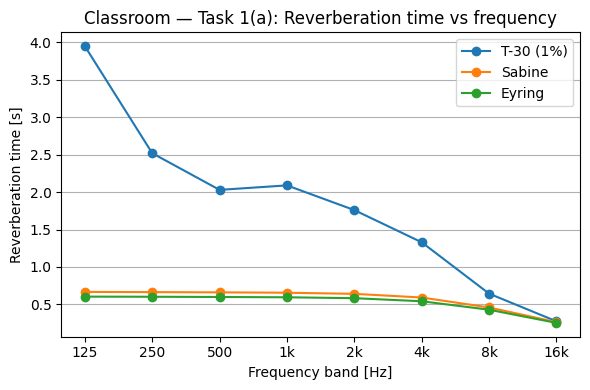

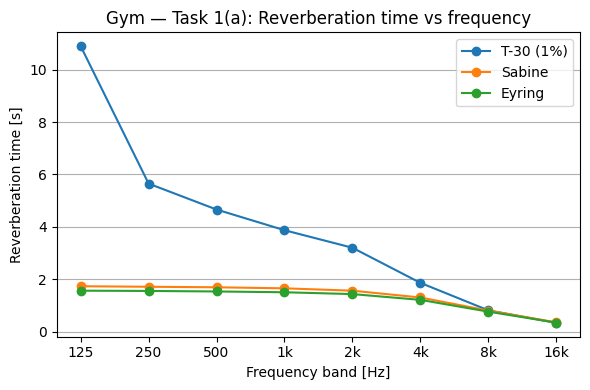

In [4]:
for room_name, room_df in {'Classroom': classroom1, 'Gym': gym1}.items():
    freqs = room_df["Freq"].tolist()
    plt.figure(figsize=(6,4))
    plt.plot(freqs, room_df["T30_1"], marker="o", label="T-30 (1%)")
    plt.plot(freqs, room_df["Sabine"], marker="o", label="Sabine")
    plt.plot(freqs, room_df["Eyring"], marker="o", label="Eyring")
    plt.title(f"{room_name} — Task 1(a): Reverberation time vs frequency")
    plt.xlabel("Frequency band [Hz]")
    plt.ylabel("Reverberation time [s]")
    plt.grid(True, axis="y")
    plt.legend()
    plt.tight_layout()
    plt.show()


##### Bar plot

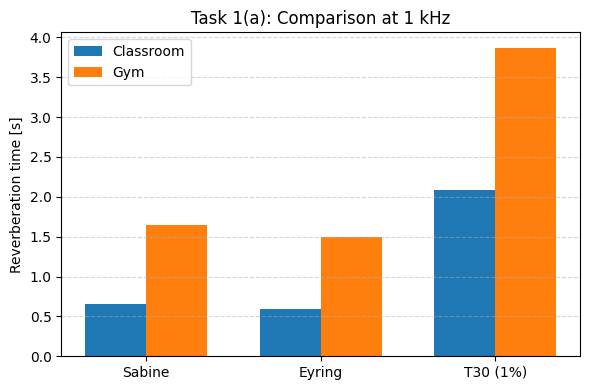

In [5]:
freq = "1k"

class_vals = classroom1[classroom1["Freq"] == freq][["Sabine", "Eyring", "T30_1"]].values.flatten()
gym_vals    = gym1[gym1["Freq"] == freq][["Sabine", "Eyring", "T30_1"]].values.flatten()

labels = ["Sabine", "Eyring", "T30 (1%)"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, class_vals, width, label="Classroom")
plt.bar(x + width/2, gym_vals, width, label="Gym")

plt.xticks(x, labels)
plt.ylabel("Reverberation time [s]")
plt.title("Task 1(a): Comparison at 1 kHz")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Plots for Task 1b

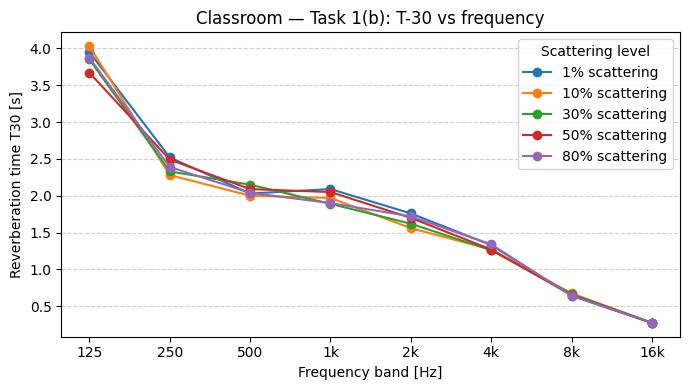

In [6]:
plt.figure(figsize=(7,4))

for col in ["T30_1", "T30_10", "T30_30", "T30_50", "T30_80"]:
    plt.plot(freqs, classroom1[col], marker="o", label=f"{col.split('_')[1]}% scattering")

plt.title("Classroom — Task 1(b): T-30 vs frequency")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time T30 [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Scattering level")
plt.tight_layout()
plt.show()


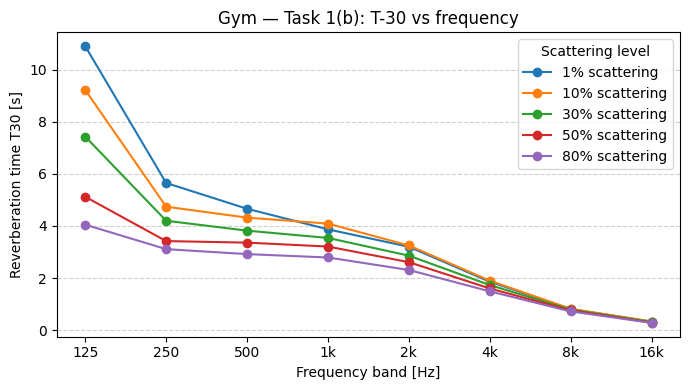

In [7]:
plt.figure(figsize=(7,4))

for col in ["T30_1", "T30_10", "T30_30", "T30_50", "T30_80"]:
    plt.plot(freqs, gym1[col], marker="o", label=f"{col.split('_')[1]}% scattering")

plt.title("Gym — Task 1(b): T-30 vs frequency")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time T30 [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Scattering level")
plt.tight_layout()
plt.show()


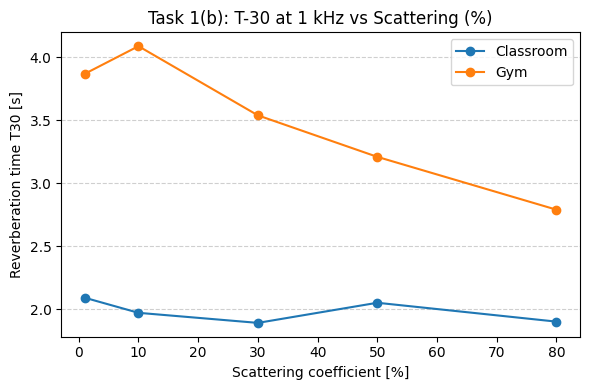

In [8]:
scattering_levels = [1, 10, 30, 50, 80]
plt.figure(figsize=(6,4))
plt.plot(scattering_levels, classroom1.loc[classroom1["Freq"]=="1k", ["T30_1","T30_10","T30_30","T30_50","T30_80"]].values.flatten(), 
         marker="o", label="Classroom")
plt.plot(scattering_levels, gym1.loc[gym1["Freq"]=="1k", ["T30_1","T30_10","T30_30","T30_50","T30_80"]].values.flatten(), 
         marker="o", label="Gym")

plt.title("Task 1(b): T-30 at 1 kHz vs Scattering (%)")
plt.xlabel("Scattering coefficient [%]")
plt.ylabel("Reverberation time T30 [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# Task 2

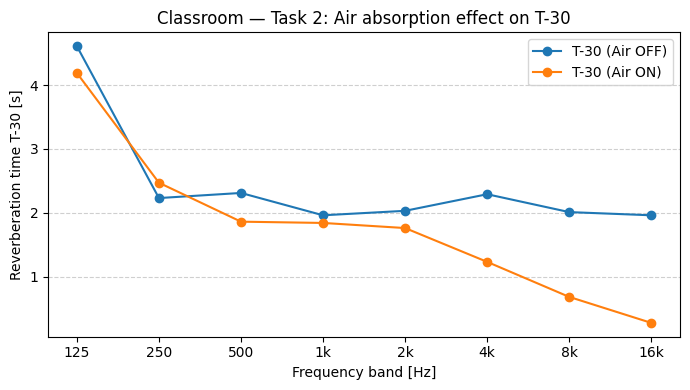

In [9]:
freqs = classroom2["Freq"].tolist()

plt.figure(figsize=(7,4))
plt.plot(freqs, classroom2["T30_AirOFF"], marker="o", label="T-30 (Air OFF)")
plt.plot(freqs, classroom2["T30_AirON"],  marker="o", label="T-30 (Air ON)")
plt.title("Classroom — Task 2: Air absorption effect on T-30")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time T-30 [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


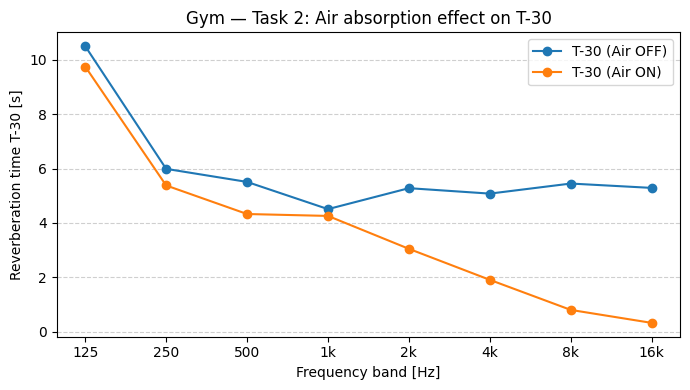

In [10]:
freqs = gym2["Freq"].tolist()

plt.figure(figsize=(7,4))
plt.plot(freqs, gym2["T30_AirOFF"], marker="o", label="T-30 (Air OFF)")
plt.plot(freqs, gym2["T30_AirON"],  marker="o", label="T-30 (Air ON)")
plt.title("Gym — Task 2: Air absorption effect on T-30")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time T-30 [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


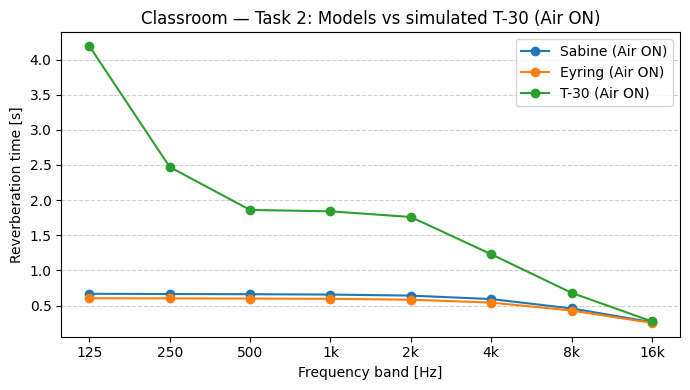

In [11]:
freqs = classroom2["Freq"].tolist()

plt.figure(figsize=(7,4))
plt.plot(freqs, classroom2["Sabine_AirON"], marker="o", label="Sabine (Air ON)")
plt.plot(freqs, classroom2["Eyring_AirON"], marker="o", label="Eyring (Air ON)")
plt.plot(freqs, classroom2["T30_AirON"],   marker="o", label="T-30 (Air ON)")
plt.title("Classroom — Task 2: Models vs simulated T-30 (Air ON)")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


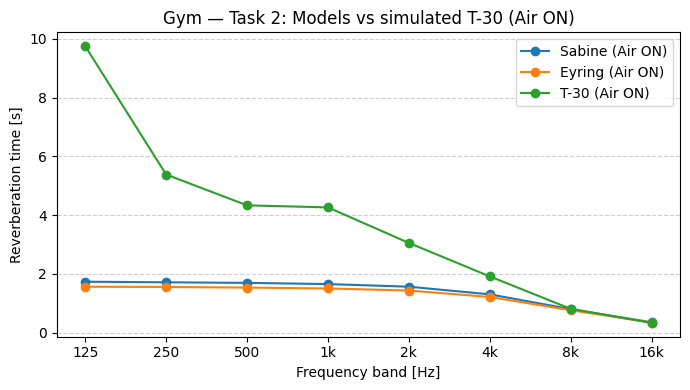

In [12]:
freqs = gym2["Freq"].tolist()

plt.figure(figsize=(7,4))
plt.plot(freqs, gym2["Sabine_AirON"], marker="o", label="Sabine (Air ON)")
plt.plot(freqs, gym2["Eyring_AirON"], marker="o", label="Eyring (Air ON)")
plt.plot(freqs, gym2["T30_AirON"],   marker="o", label="T-30 (Air ON)")
plt.title("Gym — Task 2: Models vs simulated T-30 (Air ON)")
plt.xlabel("Frequency band [Hz]")
plt.ylabel("Reverberation time [s]")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


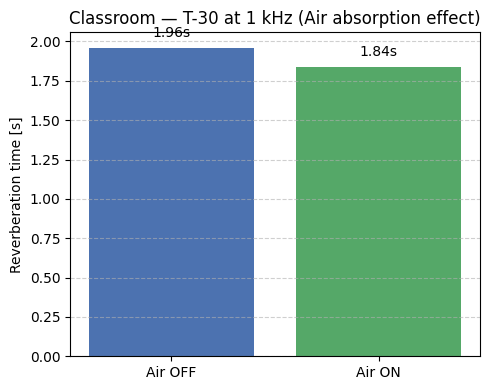

In [13]:

row_1k = classroom2[classroom2["Freq"] == "1k"].iloc[0]

# Værdier til plot
values = [row_1k["T30_AirOFF"], row_1k["T30_AirON"]]
labels = ["Air OFF", "Air ON"]

plt.figure(figsize=(5,4))
plt.bar(labels, values, color=["#4C72B0", "#55A868"])
plt.title("Classroom — T-30 at 1 kHz (Air absorption effect)")
plt.ylabel("Reverberation time [s]")
plt.grid(axis="y", linestyle="--", alpha=0.6)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f"{v:.2f}s", ha='center', va='bottom')
plt.tight_layout()
plt.show()


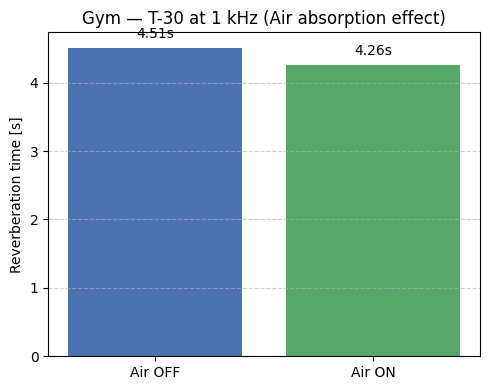

In [14]:
# Find rækken for 1 kHz
row_1k = gym2[gym2["Freq"] == "1k"].iloc[0]

# Værdier til plot
values = [row_1k["T30_AirOFF"], row_1k["T30_AirON"]]
labels = ["Air OFF", "Air ON"]

plt.figure(figsize=(5,4))
plt.bar(labels, values, color=["#4C72B0", "#55A868"])
plt.title("Gym — T-30 at 1 kHz (Air absorption effect)")
plt.ylabel("Reverberation time [s]")
plt.grid(axis="y", linestyle="--", alpha=0.6)
for i, v in enumerate(values):
    plt.text(i, v + 0.1, f"{v:.2f}s", ha='center', va='bottom')
plt.tight_layout()
plt.show()


# Task 3

#### 3a

In [ ]:
# Find "Avg"-rækkerne fra målingerne 
avg_rows = real_numbers[real_numbers.iloc[:, 0].astype(str).str.strip() == "Avg"]

t30_avg = avg_rows.iloc[0]   
t20_avg = avg_rows.iloc[1]   

freq_cols = [c for c in real_numbers.columns if "Hz" in str(c)]

T30 = t30_avg[freq_cols].astype(float).to_dict()

# Print
print("T30 (Gennemsnit) for hver frekvensbånd:")
for f, val in T30.items():
    print(f"{f}: {val:.3f} s")

# Geometri af MASTER.GEO
V = 138.9                     
S_floor = 53.8989              
S_walls = 82.37676             
S_ceiling = 35.415 + 18.4839  

#Absortion
alpha_floor = 0.05  
alpha_walls = 0.05  

# Frekvensbånd
bands_to_use = ["250 Hz", "500 Hz", "1000 Hz", "2000 Hz", "4000 Hz"]

rows = []
for band in bands_to_use:
    T = T30[band]                                   
    A_req = 0.161 * V / T                            
    A_fixed = alpha_floor * S_floor + alpha_walls * S_walls  
    A_ceiling = A_req - A_fixed                     
    alpha_ceiling = A_ceiling / S_ceiling           
    rows.append({
        "Band": band,
        "T30_target [s]": T,
        "A_required [m² Sabine]": A_req,
        "alpha_ceiling": alpha_ceiling,
        "alpha_ceiling_percent": alpha_ceiling * 100  
    })

# Tabel
start_df = pd.DataFrame(rows)
print("\nStart-bud på loft-absorbtionen (det vi har brug for):")
print(start_df.to_string(index=False, float_format=lambda x: f"{x:.3f}"))


T30 (Gennemsnit) for hver frekvensbånd:
125 Hz: nan s
250 Hz: 0.460 s
500 Hz: 0.396 s
1000 Hz: 0.382 s
2000 Hz: 0.440 s
4000 Hz: 0.520 s
8000 Hz: 0.474 s

Start-bud på loft-absorbtionen (det vi har brug for):
   Band  T30_target [s]  A_required [m² Sabine]  alpha_ceiling  alpha_ceiling_percent
 250 Hz           0.460                  48.615          0.776                 77.555
 500 Hz           0.396                  56.472          0.921                 92.132
1000 Hz           0.382                  58.542          0.960                 95.972
2000 Hz           0.440                  50.825          0.817                 81.655
4000 Hz           0.520                  43.006          0.671                 67.148


In [ ]:
# 1) Sabine-RT fra CATT 
sabine = pd.Series({
    "125 Hz": 0.640,
    "250 Hz": 0.440,
    "500 Hz": 0.380,
    "1000 Hz": 0.364,
    "2000 Hz": 0.412,
    "4000 Hz": 0.459,
})

# 2) Målt T30-Avg fra Excel 
t30_avg = pd.Series({
    "125 Hz": 0.460,   
    "250 Hz": 0.460,
    "500 Hz": 0.396,
    "1000 Hz": 0.382,
    "2000 Hz": 0.440,
    "4000 Hz": 0.520,
})

# 3) Teoretisk start-gæt
alpha_start = pd.Series({
    "125 Hz": 50.0,
    "250 Hz": 78.0,
    "500 Hz": 92.0,
    "1000 Hz": 96.0,
    "2000 Hz": 82.0,
    "4000 Hz": 67.0,
})

# 4) Bånd vi vil tune 
bands = ["250 Hz", "500 Hz", "1000 Hz", "2000 Hz", "4000 Hz"]

# 5) Skalér loft-α med f = T_model / T_target
scale = sabine[bands] / t30_avg[bands]
alpha_new = alpha_start[bands] * scale

print("Skaleringsfaktorer f = T_model/T_target:")
print(scale)

print("\nNye loft-absorptioner (alpha_new):")
print(alpha_new.round(1))


Skaleringsfaktorer f = T_model/T_target:
250 Hz     0.956522
500 Hz     0.959596
1000 Hz    0.952880
2000 Hz    0.936364
4000 Hz    0.882692
dtype: float64

Nye loft-absorptioner (alpha_new):
250 Hz     74.6
500 Hz     88.3
1000 Hz    91.5
2000 Hz    76.8
4000 Hz    59.1
dtype: float64


In [18]:
avg_rows = real_numbers[real_numbers.iloc[:, 0].astype(str).str.strip() == "Avg"]
t30_avg_row = avg_rows.iloc[0]

freq_t30 = [c for c in real_numbers.columns if "Hz" in str(c)]
t30_avg = t30_avg_row[freq_t30].astype(float)

freq_sab = [c for c in guess1.columns if "Hz" in str(c)]
sabine_row = guess1.iloc[0]
sabine = sabine_row[freq_sab].astype(float)

# Fælles frekvensbånd mellem T30 og Sabine
bands_all = sorted(set(freq_t30) & set(freq_sab))

V         = 138.9  
S_floor   = 53.90   
S_walls   = 82.38   
S_ceiling = 53.90   

alpha_floor = 0.05
alpha_walls = 0.05

A_fixed = alpha_floor * S_floor + alpha_walls * S_walls  

tune_bands = [b for b in bands_all if b != "125 Hz"]

rows = []
for band in tune_bands:
    T = t30_avg[band]
    A_total   = 0.161 * V / T          
    A_ceiling = A_total - A_fixed      
    alpha = A_ceiling / S_ceiling      
    rows.append({
        "Band": band,
        "T30_target [s]": T,
        "A_required [m² Sabine]": A_total,
        "alpha_ceiling": alpha,
        "alpha_ceiling_percent": alpha * 100,
    })

start_df = pd.DataFrame(rows).set_index("Band")


alpha_start = start_df["alpha_ceiling_percent"]
T_model  = sabine[tune_bands]
T_target = t30_avg[tune_bands]

scale = T_model / T_target
alpha_tuned = alpha_start * scale


order = ["125 Hz", "250 Hz", "500 Hz", "1000 Hz", "2000 Hz", "4000 Hz"]

alpha_final = alpha_tuned.reindex(order)  

if pd.isna(alpha_final.get("125 Hz", float("nan"))):
    alpha_final["125 Hz"] = 50.0

alpha_final = alpha_final.round(1)

vals = [alpha_final[f] for f in order]
vals_str = " ".join(str(int(round(v))) for v in vals)

print(f"ABS ceilingback    <{vals_str}>")
print(f"ABS mainceilingabs <{vals_str}> ")


ABS ceilingback    <50 74 88 91 76 59>
ABS mainceilingabs <50 74 88 91 76 59> 


##### Check values

In [ ]:
# Identificér frekvenser automatisk
freq_cols = [c for c in real_numbers.columns if "Hz" in c]

# Find rækkerne med Avg og confint
avg_row = real_numbers[real_numbers.iloc[:,0].astype(str).str.contains("Avg")].iloc[0]
conf_row = real_numbers[real_numbers.iloc[:,0].astype(str).str.contains("confint")].iloc[0]

# Gem kun frekvenskolonner
t30_avg = avg_row[freq_cols].astype(float)
confint = conf_row[freq_cols].astype(float)

# Hent model-værdier fra Final Guess
model_vals = final_guess.iloc[0][freq_cols].astype(float)

# Beregn CI-min, CI-max og om modellen ligger indenfor
rows = []

for band in freq_cols:
    avg = t30_avg[band]
    ci = confint[band]
    m  = model_vals[band]

    ci_min = avg - ci
    ci_max = avg + ci
    inside = (m >= ci_min) and (m <= ci_max)

    rows.append([band, m, avg, ci_min, ci_max, inside])

# Dataframe
df_out = pd.DataFrame(rows, columns=["Band", "Model", "Measured Avg", "CI Min", "CI Max", "Inside CI?"])

df_out


,Band,Model,Measured Avg,CI Min,CI Max,Inside CI?
0,125 Hz,0.640,NaN,NaN,NaN,False
1,250 Hz,0.460,0.460,0.426001,0.493999,True
2,500 Hz,0.395,0.396,0.362457,0.429543,True
3,1000 Hz,0.381,0.382,0.371613,0.392387,True
4,2000 Hz,0.439,0.440,0.431222,0.448778,True
5,4000 Hz,0.506,0.520,0.496774,0.543226,True
6,8000 Hz,0.491,0.474,0.453226,0.494774,True


# Task 4

In [ ]:

# Identificér frekvenskolonnen
freq_col = simnumbers.columns[0]

# Tag kun 500 Hz-rækken
sim_500  = simnumbers[simnumbers[freq_col].astype(str).str.contains("500")].iloc[0]
meas_500 = measured[measured[freq_col].astype(str).str.contains("500")].iloc[0]

# Fjern frekvenskolonnen, så vi kun har afstandskolonner
sim_vals  = sim_500.drop(labels=freq_col).astype(float)
meas_vals = meas_500.drop(labels=freq_col).astype(float)

# Konverter "50cm", "100cm" → meter
distance_m = [int(col.replace("cm", "")) / 100 for col in sim_vals.index]

# Lav DataFrame
t4 = pd.DataFrame({
    "Distance_m": distance_m,
    "Measured_raw": meas_vals.values,
    "Simulated": sim_vals.values,
})

# Offset = gennemsnit ved 50 + 100 cm
offset = (
    (t4.loc[0, "Simulated"] - t4.loc[0, "Measured_raw"]) +
    (t4.loc[1, "Simulated"] - t4.loc[1, "Measured_raw"])
) / 2

# Korrigeret SPL + fejl
t4["Measured_corrected"] = t4["Measured_raw"] + offset
t4["Error"] = t4["Simulated"] - t4["Measured_corrected"]

print("Offset 500 Hz:", offset)
t4


Offset 500 Hz: 25.25375


,Distance_m,Measured_raw,Simulated,Measured_corrected,Error
0,0.5,41.6941,66.73,66.94785,-0.21785
1,1.0,36.7884,62.26,62.04215,0.21785
2,1.5,34.6819,60.38,59.93565,0.44435
3,2.0,32.9197,58.81,58.17345,0.63655
4,2.5,32.2022,60.00,57.45595,2.54405


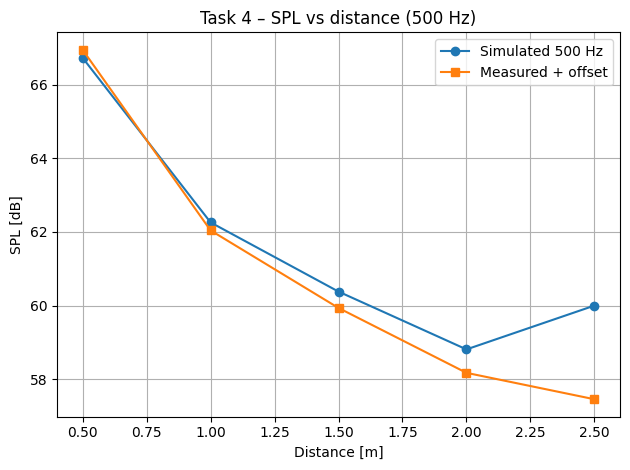

In [21]:
plt.figure()
plt.plot(t4["Distance_m"], t4["Simulated"], marker="o", label="Simulated 500 Hz")
plt.plot(t4["Distance_m"], t4["Measured_corrected"], marker="s", label="Measured + offset")
plt.xlabel("Distance [m]")
plt.ylabel("SPL [dB]")
plt.title("Task 4 – SPL vs distance (500 Hz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Task 5

#### Aflæs Forhold I arc room

In [22]:
# Hjørner
corners = np.array([
    [ 0.000, 0.000, 0.000],   
    [ 4.740, 0.000, 0.000],   
    [ 4.740, 0.600, 0.000],   
    [ 6.580, 0.600, 0.000],  
    [ 6.580, 7.985, 0.000],   
    [-1.360, 7.985, 0.000],   
    [-1.360, 6.175, 0.000],   
    [ 0.000, 6.175, 0.000],   

    [ 0.000, 0.000, 2.676],   
    [ 4.740, 0.000, 2.676],   
    [ 4.740, 0.600, 2.676],   
    [ 6.580, 0.600, 2.676],   
    [ 6.580, 5.550, 2.676],   

    [ 6.580, 5.550, 2.300],   
    [ 6.580, 7.985, 2.300],   
    [-1.360, 7.985, 2.300],   
    [-1.360, 6.175, 2.300],   
    [ 0.000, 6.175, 2.300],   

    [ 0.000, 5.550, 2.676],   
    [ 0.000, 5.550, 2.300],   
])

x = corners[:, 0]
y = corners[:, 1]
z = corners[:, 2]

# 1) Avg. len
L_min = y.min()
L_max = y.max()
L_avg = L_max - L_min

# 2) Gulvareal via hjørner med z = 0 
floor_mask = np.isclose(z, 0.0)
floor_xy = corners[floor_mask, :2]  

# Shoelace-formlen
x_floor = floor_xy[:, 0]
y_floor = floor_xy[:, 1]

x_shift = np.roll(x_floor, -1)
y_shift = np.roll(y_floor, -1)

A_floor = 0.5 * np.abs(np.sum(x_floor * y_shift - x_shift * y_floor))

# 3) Avg. bredde ud fra areal
W_avg = A_floor / L_avg

print(f"Avg. længde L_avg = {L_avg:.3f} m")
print(f"Avg. bredde W_avg = {W_avg:.3f} m")


Avg. længde L_avg = 7.985 m
Avg. bredde W_avg = 6.750 m


#### Beregn første 10 horisontal modes

In [23]:
# Calculated Dimensions
L = 7.985
W = 6.75
c = 343.0

modes = []
for n in range(0, 6):
    for m in range(0, 6):
        if n == 0 and m == 0:
            continue
        f_nm = (c/2.0)*math.sqrt((n/L)**2 + (m/W)**2)
        modes.append((n,m,f_nm))

modes_df = pd.DataFrame(modes, columns=["n","m","f_Hz"])
modes_df_sorted = modes_df.sort_values("f_Hz").reset_index(drop=True)
first10 = modes_df_sorted.head(10)
first10


,n,m,f_Hz
0,1,0,21.477771
1,0,1,25.407407
2,1,1,33.269070
3,2,0,42.955542
4,2,1,49.907063
5,0,2,50.814815
6,1,2,55.167382
7,3,0,64.433312
8,2,2,66.538139
9,3,1,69.261736


In [ ]:
from sympy import *
A = Matrix([[1, 0, 0],[0, 0, 1], []])
